# MiniProject Chronic_Kidney_Disease

[Chronic_Kidney_Disease Data Set](https://archive.ics.uci.edu/ml/datasets/Chronic_Kidney_Disease)

### Introduction

> Chronic kidney disease is one of the most common diseases facing humans, as well as one of the most dangerous. This disease is defined as a long-term condition in which the kidneys do not work as they should. It is a common condition often associated with aging. It can infect anyone, but it is more common in most countries such as those in South Asia.

> We used data containing features for reasons that indicate chronic kidney disease. We used machine learning algorithms to help classify the person with or without this disease.

In [38]:
# lib's

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

# display all the columns of the dataframes
pd.pandas.set_option('display.max_columns', None)

# sklearn
from sklearn.preprocessing import LabelEncoder

from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

import pickle


### Load dataset

In [2]:
df = pd.read_csv('../Dataset/kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


### EDA

In [3]:
# show shape of dataset
df.shape

(400, 26)

In [4]:
# describe the dataset
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [5]:
# show information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [6]:
# dropping id column
df.drop('id', axis = 1, inplace = True)

In [7]:
# rename column names to make it more user-friendly
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [8]:
# Check Null values
df.isnull().sum()

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
haemoglobin                 52
packed_cell_volume          70
white_blood_cell_count     105
red_blood_cell_count       130
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

Numerical Columns: ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'haemoglobin']


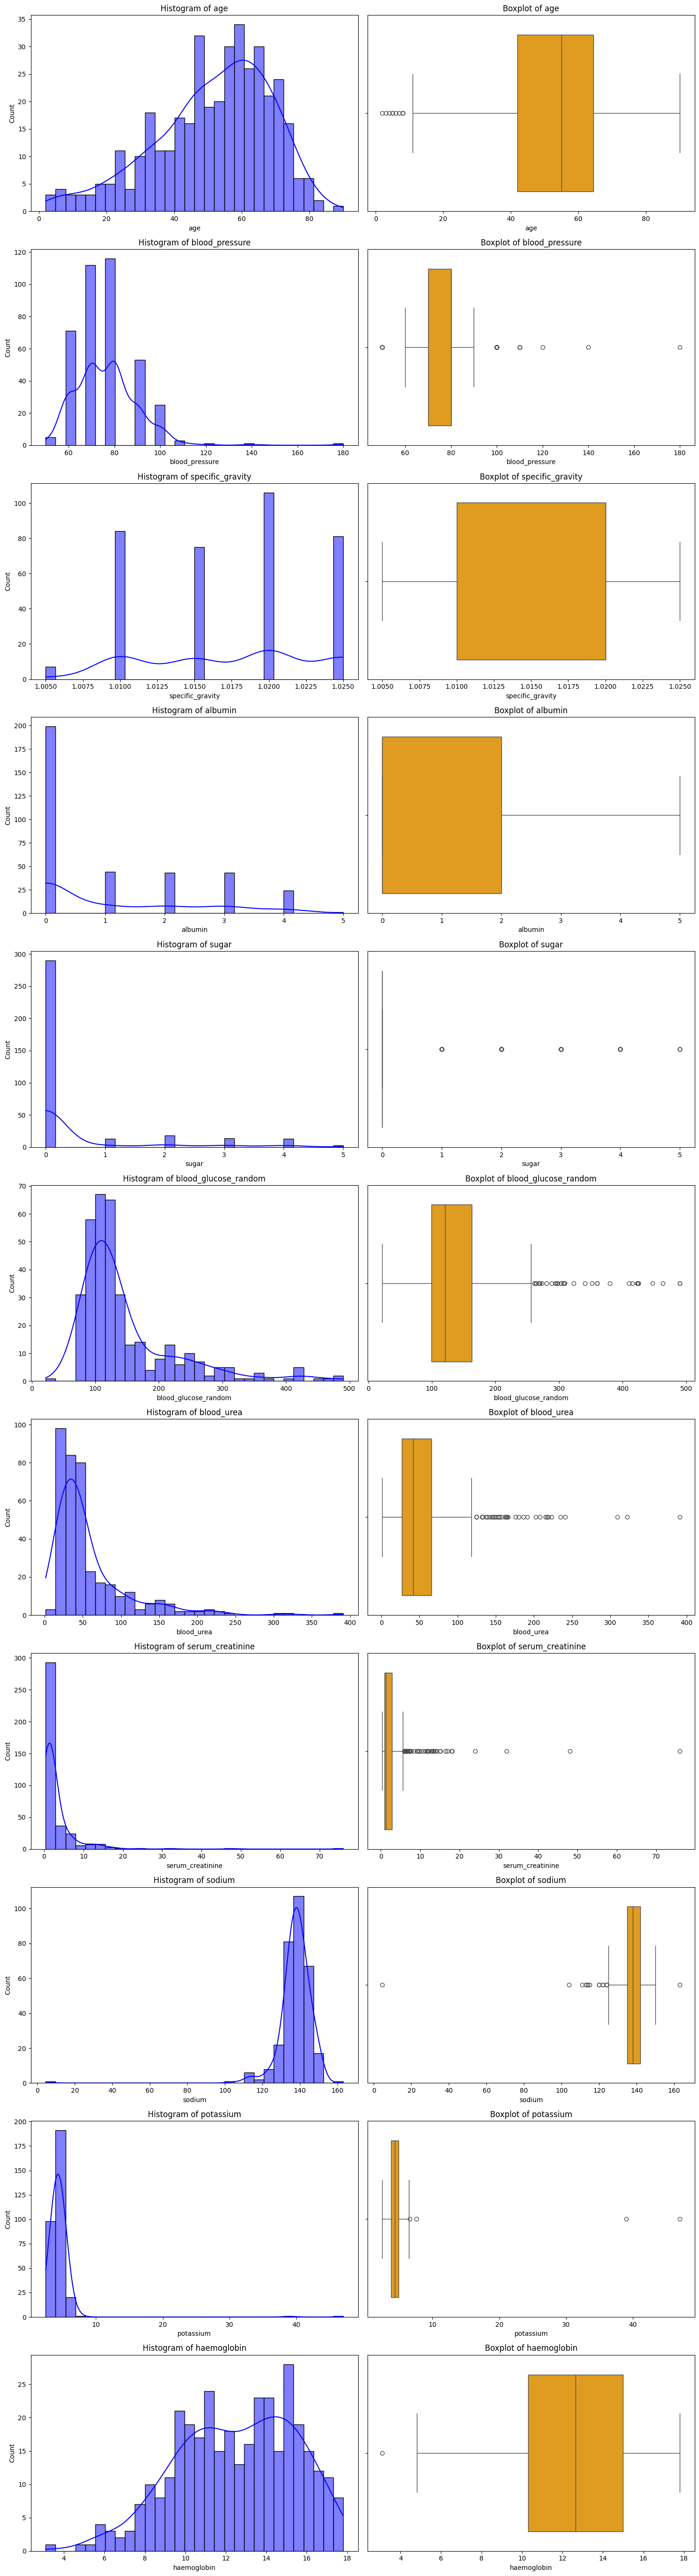

Categorical Columns: ['red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema', 'aanemia', 'class']


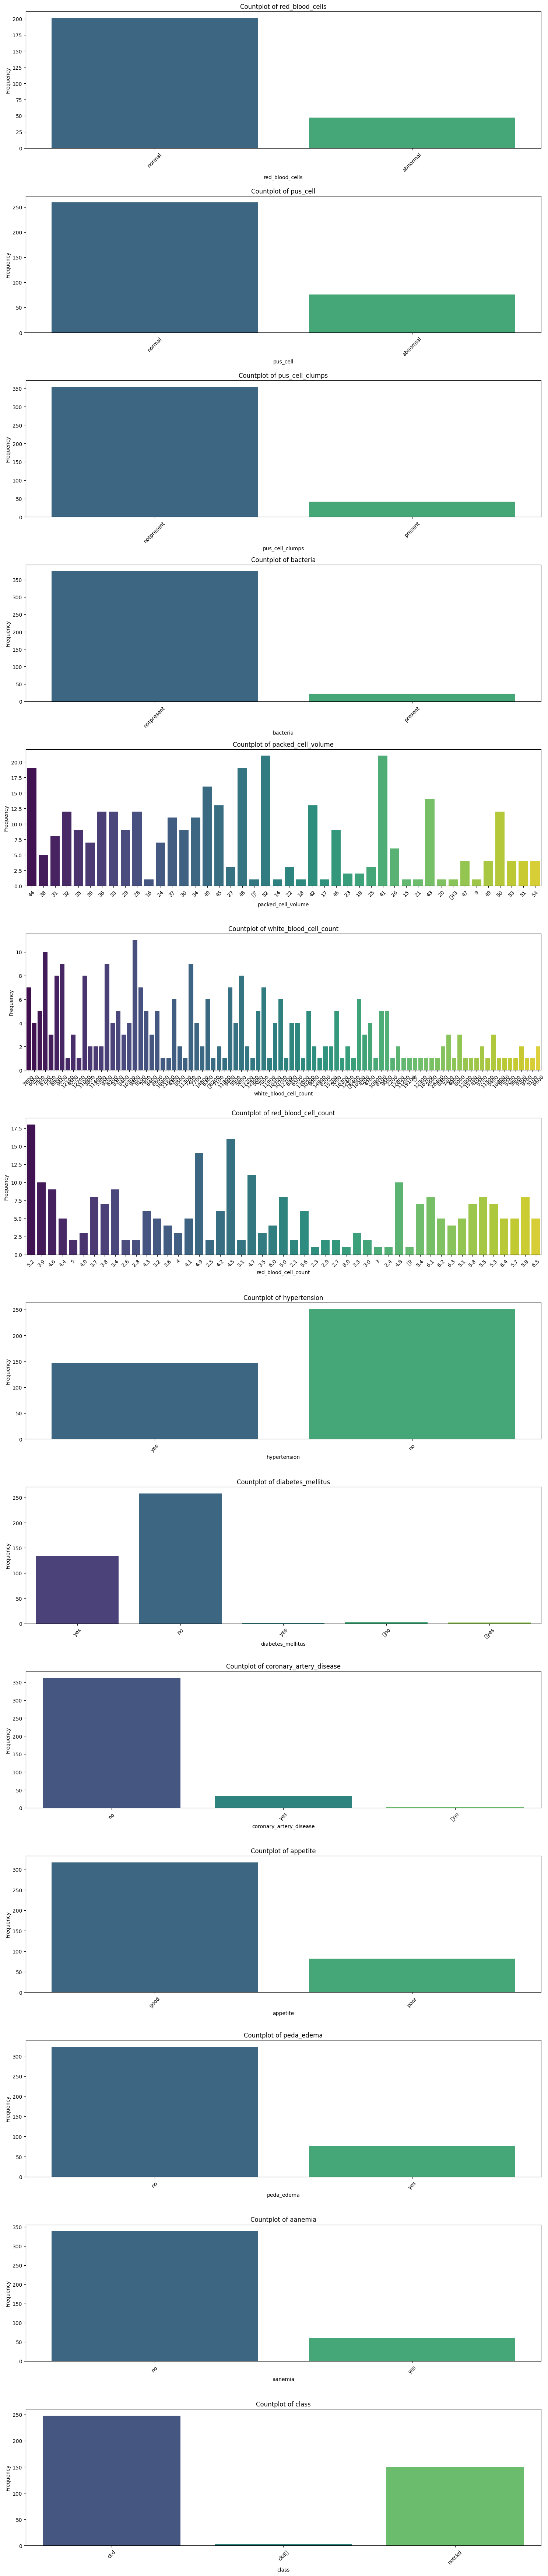

In [10]:
def numeric_categorical_columns(df):

    numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
    categorical_columns = df.select_dtypes(exclude=['number']).columns.tolist()

#     print(f"Numeric Columns: {numeric_columns} \n")
#     print(f"Categorical Columns: {categorical_columns} \n")
    
    # Plot numerical data
    if numeric_columns:
        print("Numerical Columns:", numeric_columns)
        plt.figure(figsize=(15, 5 * len(numeric_columns)))
        for i, col in enumerate(numeric_columns, 1):
            plt.subplot(len(numeric_columns), 2, i * 2 - 1)
            sns.histplot(df[col], kde=True, color='blue', bins=30)
            plt.title(f"Histogram of {col}")
            plt.xlabel(col)

            plt.subplot(len(numeric_columns), 2, i * 2)
            sns.boxplot(data=df, x=col, color='orange')
            plt.title(f"Boxplot of {col}")
        plt.tight_layout()
        plt.show()

    # Plot categorical data
    if categorical_columns:
        print("Categorical Columns:", categorical_columns)
        plt.figure(figsize=(15, 5 * len(categorical_columns)))
        for i, col in enumerate(categorical_columns, 1):
            plt.subplot(len(categorical_columns), 1, i)
            sns.countplot(data=df, x=col, palette='viridis')
            plt.title(f"Countplot of {col}")
            plt.xlabel(col)
            plt.ylabel("Frequency")
            plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        
    return numeric_columns, categorical_columns

numeric_columns, categorical_columns = numeric_categorical_columns(df)

### Data Pre-procesing

In [11]:
cols = ['packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count']

for col in cols:
    print(f"{col} has {df[col].unique()} | \n{len(df[col].unique())} values\n{df[col].dtype} datatype\n")

packed_cell_volume has ['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '\t?' '52' '14' '22' '18' '42' '17' '46' '23'
 '19' '25' '41' '26' '15' '21' '43' '20' '\t43' '47' '9' '49' '50' '53'
 '51' '54'] | 
45 values
object datatype

white_blood_cell_count has ['7800' '6000' '7500' '6700' '7300' nan '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9800' '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300'
 '7200' '7700' '14600' '6300' '\t6200' '7100' '11800' '9400' '5500' '5800'
 '13200' '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800'
 '6500' '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300'
 '12400' '\t8400' '10500' '4200' '4700' '10900' '8100' '9500' '2200'
 '12800' '11200' '19100' '\t?' '12300' '16700' '2600' '26400' '8800'
 '7400' '4900' '8000' '12000' '15700' '4100' '5700' '11500' '5400' '10800'
 '9900' '5200' '5900' '9300' '9700' '5100' '

In [12]:
# replace the unexpected cahrectors
df['packed_cell_volume'].replace(to_replace = {'\t?':np.nan,'\t43':'43'},inplace=True)
df['white_blood_cell_count'].replace(to_replace = {'\t6200':'6200','\t8400':'8400','\t?':np.nan},inplace=True)
df['red_blood_cell_count'].replace(to_replace = {'\t?':np.nan},inplace=True)

# converting necessary columns to numerical type 
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [13]:
# make a replace for incorect value 
df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)
df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')
df['class'] = df['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

# ckd == 0 and not ckd == 1
df['class'] = df['class'].map({'ckd': 0, 'not ckd': 1})
df['class'] = pd.to_numeric(df['class'], errors='coerce')

Numerical Columns: ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count', 'class']


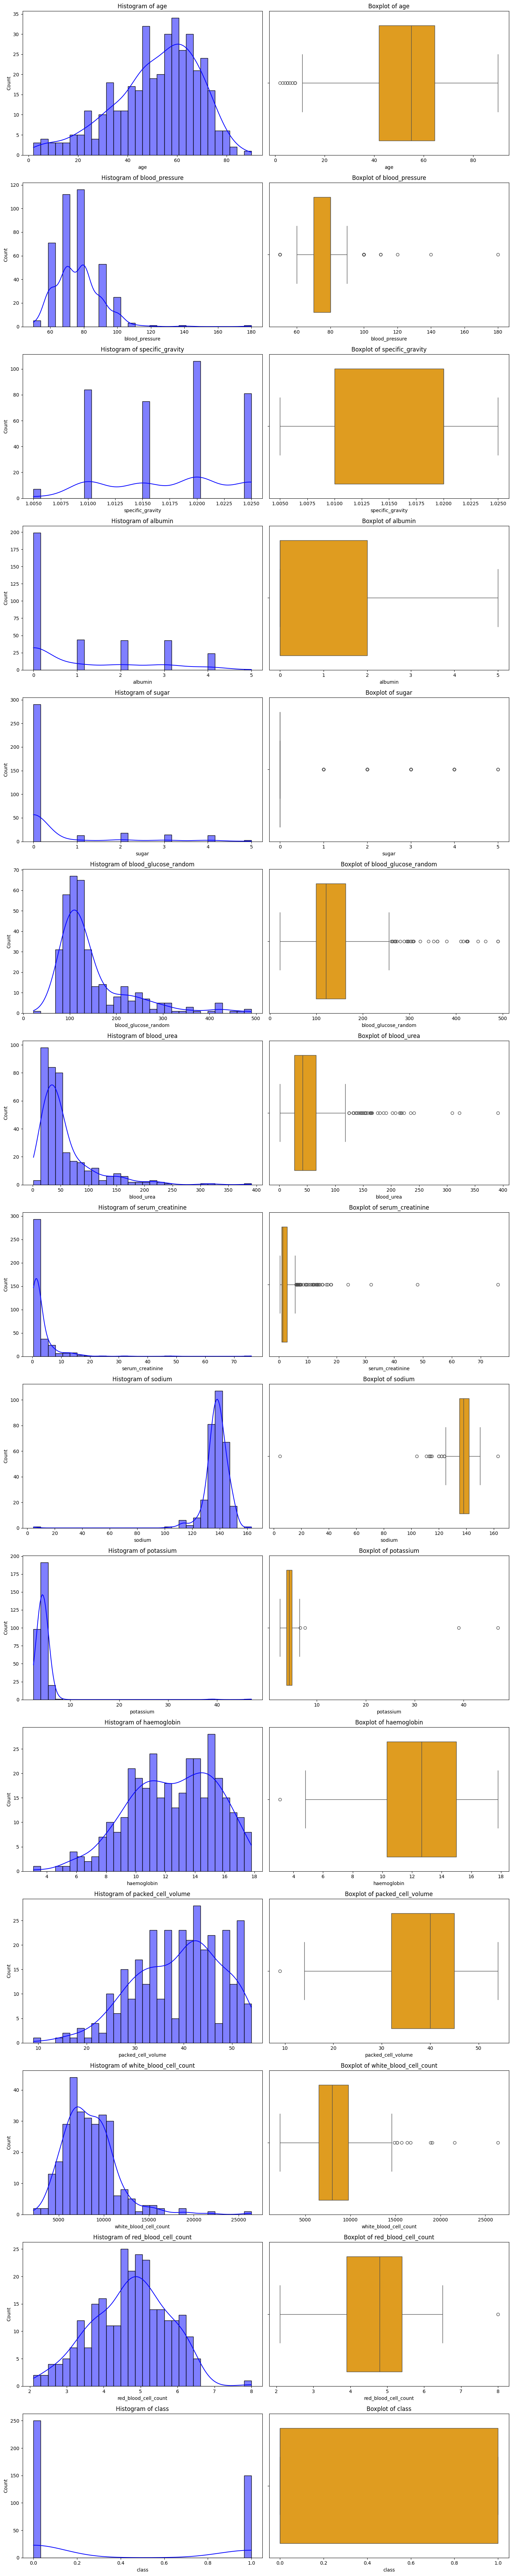

Categorical Columns: ['red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema', 'aanemia']


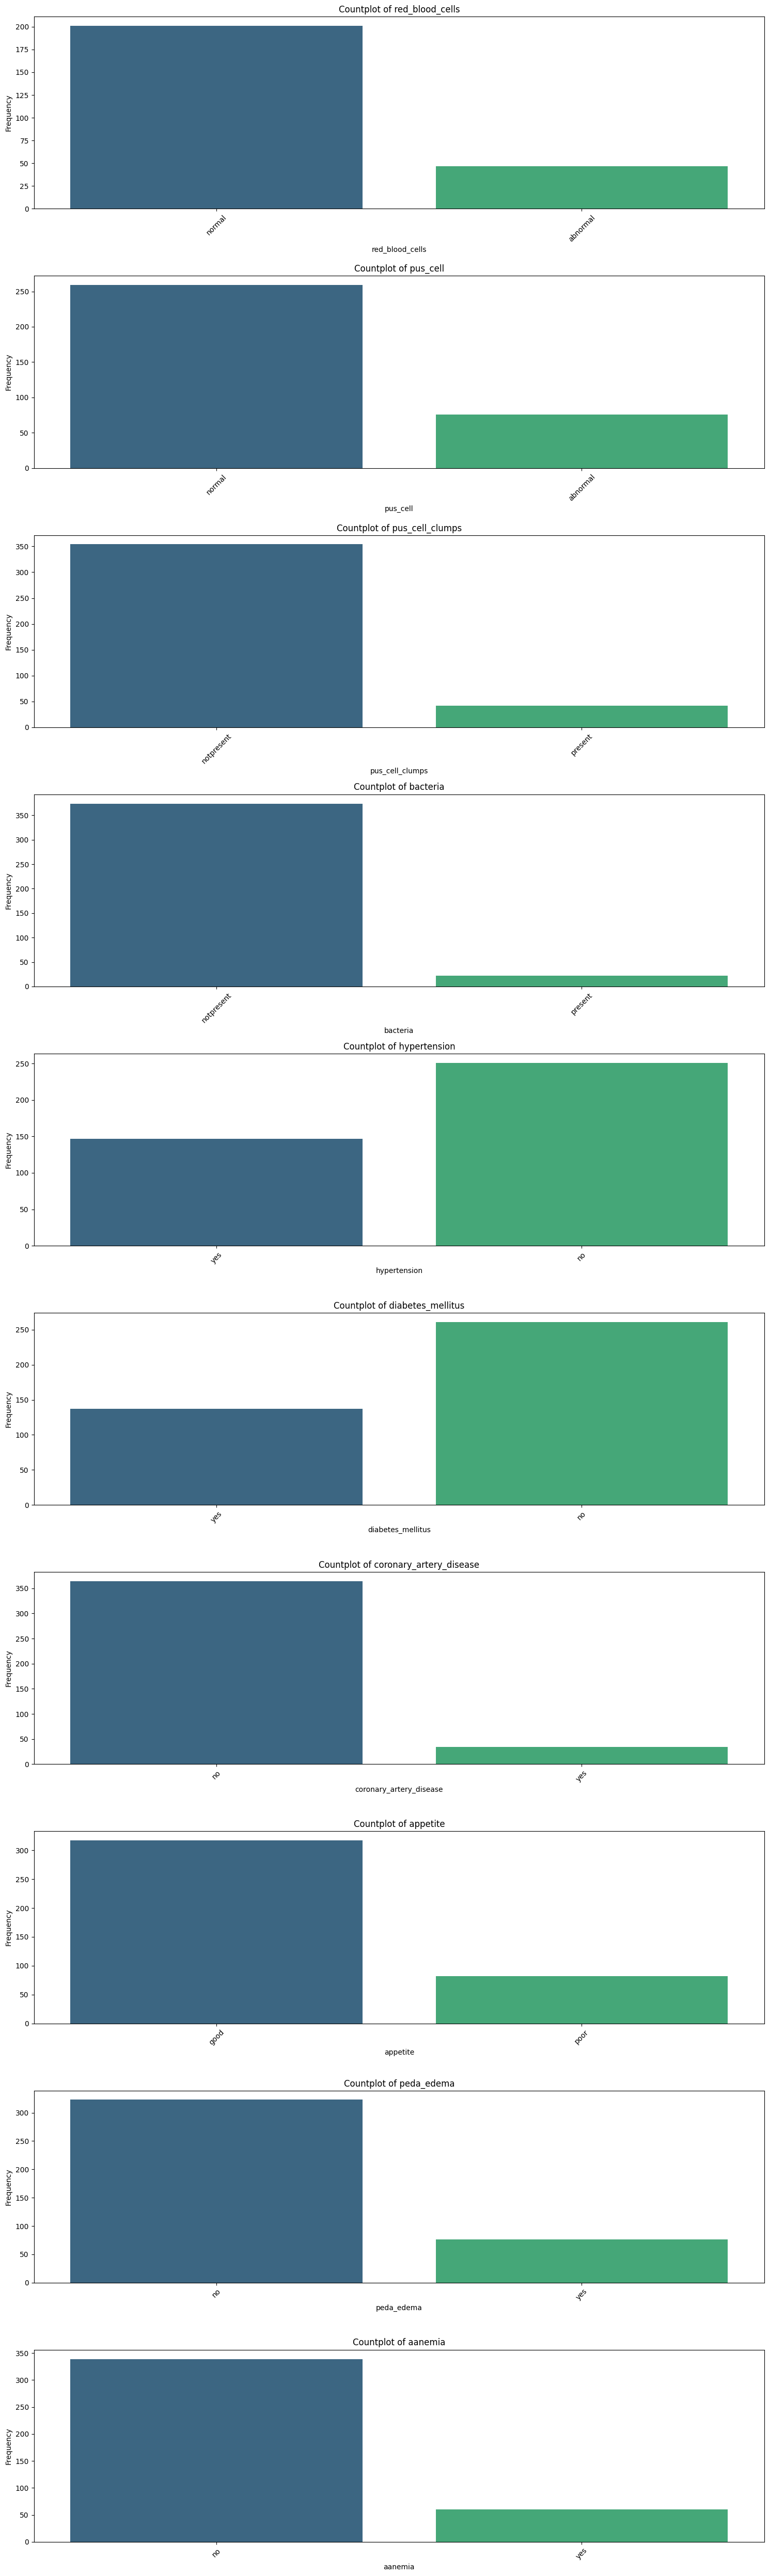

In [14]:
numeric_columns, categorical_columns = numeric_categorical_columns(df)

In [16]:
# handle missing values
def handle_missing_values_numerical(df, numerical_columns):
    """
    Handles missing values in numerical columns by replacing them with the median.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the data.
        numerical_columns (list): List of numerical column names.

    Returns:
        pd.DataFrame: DataFrame with missing values in numerical columns handled.
    """
    for col in numerical_columns:
        median_value = df[col].median()  # Calculate the median
        df[col].fillna(median_value, inplace=True)  # Replace missing values with the median
    return df

def handle_missing_values_categorical(df, categorical_columns):
    """
    Handles missing values in categorical columns by replacing them with the mode.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the data.
        categorical_columns (list): List of categorical column names.

    Returns:
        pd.DataFrame: DataFrame with missing values in categorical columns handled.
    """
    for col in categorical_columns:
        mode_value = df[col].mode()[0]  # Calculate the mode
        df[col].fillna(mode_value, inplace=True)  # Replace missing values with the mode
    return df

df = handle_missing_values_numerical(df, numeric_columns)
df = handle_missing_values_categorical(df, categorical_columns)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      400 non-null    float64
 1   blood_pressure           400 non-null    float64
 2   specific_gravity         400 non-null    float64
 3   albumin                  400 non-null    float64
 4   sugar                    400 non-null    float64
 5   red_blood_cells          400 non-null    object 
 6   pus_cell                 400 non-null    object 
 7   pus_cell_clumps          400 non-null    object 
 8   bacteria                 400 non-null    object 
 9   blood_glucose_random     400 non-null    float64
 10  blood_urea               400 non-null    float64
 11  serum_creatinine         400 non-null    float64
 12  sodium                   400 non-null    float64
 13  potassium                400 non-null    float64
 14  haemoglobin              4

In [18]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,0
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,4.8,no,no,no,good,no,no,0
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,4.8,no,yes,no,poor,no,yes,0
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,0
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,0


In [19]:
# Since all of our columns have two classes, we can use the label encoder
le = LabelEncoder()

for col in categorical_columns:
    df[col] = le.fit_transform(df[col])
    
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,4.8,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,4.8,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,4.6,0,0,0,0,0,0,0


Numerical Columns: ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema', 'aanemia', 'class']


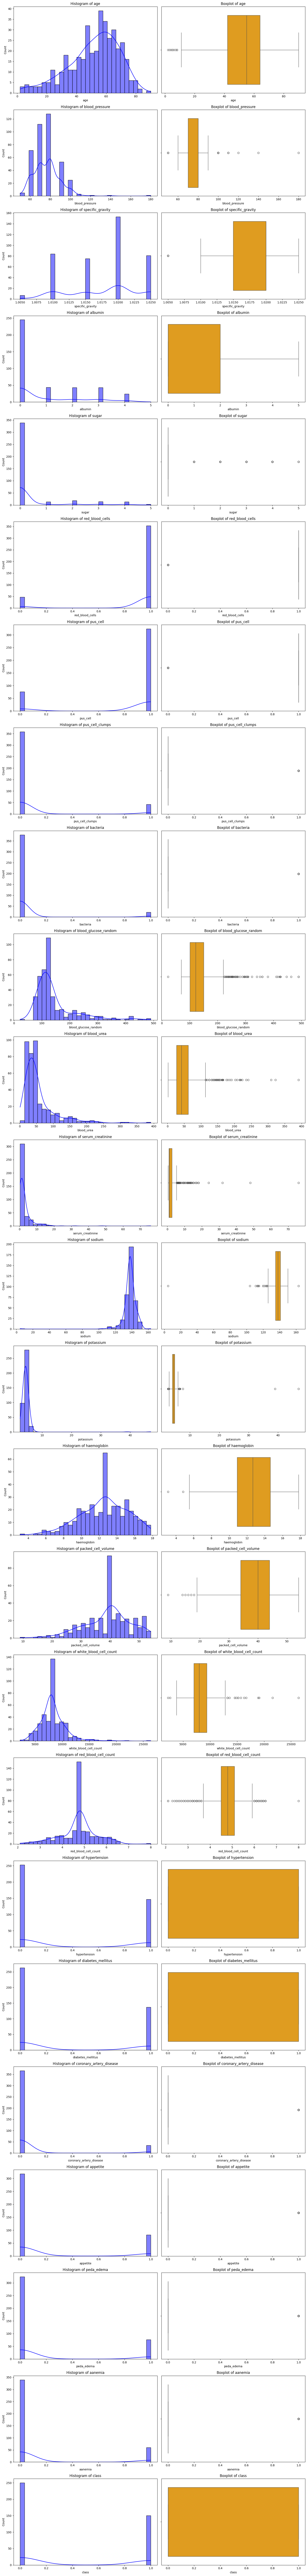

(['age',
  'blood_pressure',
  'specific_gravity',
  'albumin',
  'sugar',
  'red_blood_cells',
  'pus_cell',
  'pus_cell_clumps',
  'bacteria',
  'blood_glucose_random',
  'blood_urea',
  'serum_creatinine',
  'sodium',
  'potassium',
  'haemoglobin',
  'packed_cell_volume',
  'white_blood_cell_count',
  'red_blood_cell_count',
  'hypertension',
  'diabetes_mellitus',
  'coronary_artery_disease',
  'appetite',
  'peda_edema',
  'aanemia',
  'class'],
 [])

In [20]:
numeric_categorical_columns(df)

In [21]:
df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
count,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,51.562500,76.575000,1.017712,0.90000,0.395000,0.882500,0.810000,0.105000,0.055000,145.062500,56.693000,2.997125,137.631250,4.577250,12.54250,39.082500,8298.500000,4.737750,0.367500,0.34250,0.085000,0.205000,0.190000,0.150000,0.375000
std,16.982996,13.489785,0.005434,1.31313,1.040038,0.322418,0.392792,0.306937,0.228266,75.260774,49.395258,5.628886,9.206332,2.821357,2.71649,8.162245,2529.593814,0.841439,0.482728,0.47514,0.279231,0.404207,0.392792,0.357519,0.484729
min,2.000000,50.000000,1.005000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.10000,9.000000,2200.000000,2.100000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.015000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,101.000000,27.000000,0.900000,135.000000,4.000000,10.87500,34.000000,6975.000000,4.500000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,80.000000,1.020000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.65000,40.000000,8000.000000,4.800000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,64.000000,80.000000,1.020000,2.00000,0.000000,1.000000,1.000000,0.000000,0.000000,150.000000,61.750000,2.725000,141.000000,4.800000,14.62500,44.000000,9400.000000,5.100000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000
max,90.000000,180.000000,1.025000,5.00000,5.000000,1.000000,1.000000,1.000000,1.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.80000,54.000000,26400.000000,8.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


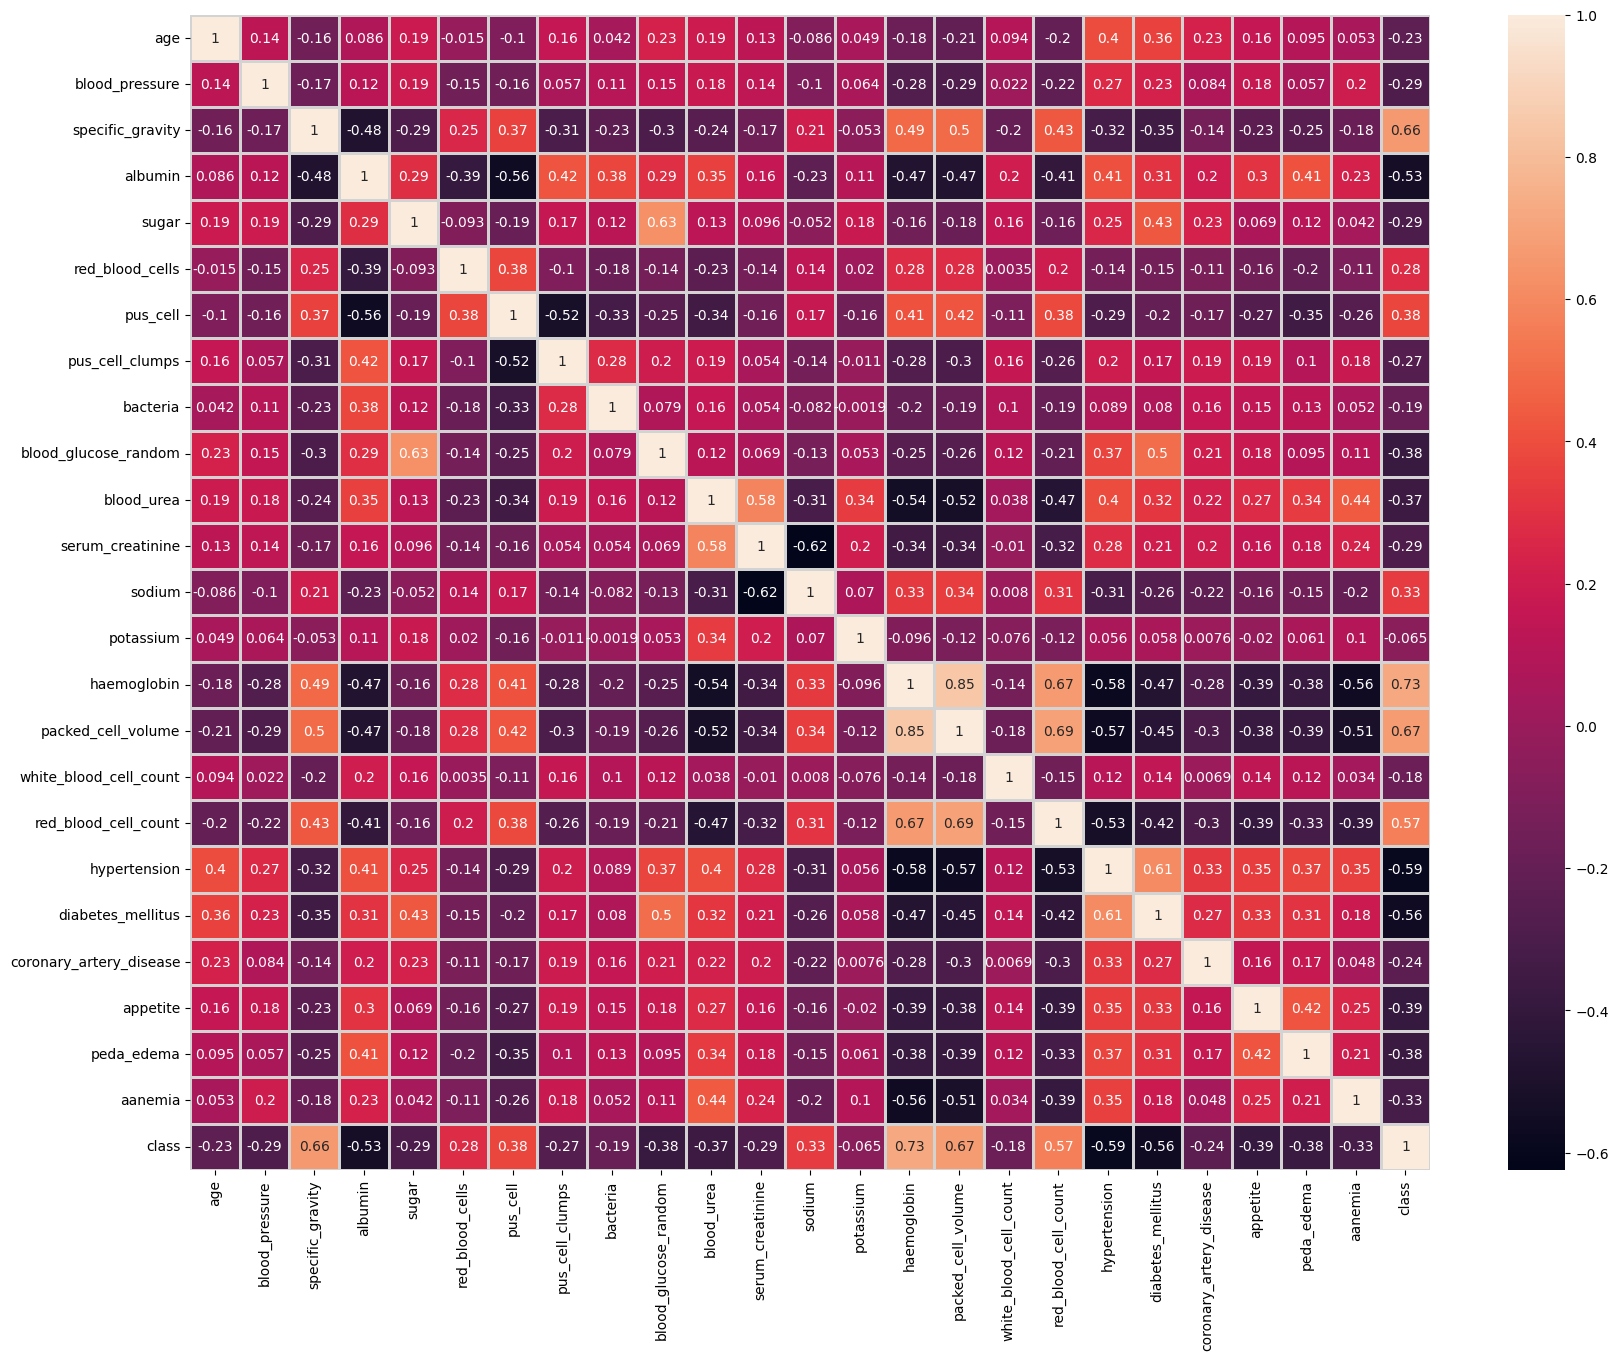

In [23]:
# Calculation the corr
cor = df.corr()
plt.figure(figsize = (20, 15))
sns.heatmap(cor, annot = True, linewidths = 1, linecolor = 'lightgrey')
plt.show()

### feature selection

In [28]:
def feature_selection(df, target_column, method="correlation", threshold=0.1, k=10):
    """
    Selects features from a DataFrame based on the specified method.

    Parameters:
        df (pd.DataFrame): The input DataFrame.
        target_column (str): The name of the target column.
        method (str): Feature selection method ('correlation', 'variance', 'importance').
        threshold (float): Threshold for correlation or variance (default 0.1).
        k (int): Number of features to select for statistical tests (default 10).

    Returns:
        list: List of selected feature names.
    """
    X = df.drop(columns=[target_column])
    y = df[target_column]
    
    if method == "correlation":
        # Select features based on correlation with the target
        corr_matrix = df.corr()
        target_corr = corr_matrix[target_column].drop(target_column)
        selected_features = target_corr[abs(target_corr) > threshold].index.tolist()
    
    elif method == "variance":
        # Select features based on variance threshold
        selector = VarianceThreshold(threshold=threshold)
        selector.fit(X)
        selected_features = X.columns[selector.get_support()].tolist()
    
    elif method == "importance":
        # Select features based on feature importance using RandomForest
        model = RandomForestClassifier(random_state=42)
        model.fit(X, y)
        feature_importances = pd.Series(model.feature_importances_, index=X.columns)
        selected_features = feature_importances[feature_importances > threshold].index.tolist()
    
    elif method == "statistical_test":
        # Select features using ANOVA F-test
        selector = SelectKBest(score_func=f_classif, k=k)
        selector.fit(X, y)
        selected_features = X.columns[selector.get_support()].tolist()
    
    elif method == 'mutual_info':
        # Select top k features based on mutual information
        selector = SelectKBest(mutual_info_classif, k=k)
        selector.fit(X, y)
        selected_features = X.columns[selector.get_support()].tolist()
    
    else:
        raise ValueError("Invalid method. Choose from 'correlation', 'variance', 'importance', or 'statistical_test'.")
    
    return selected_features


# Feature selection
selected_features_corr = feature_selection(df, target_column="class", method="correlation", threshold=0.1)
selected_features_var = feature_selection(df, target_column="class", method="variance", threshold=0.0)
selected_features_imp = feature_selection(df, target_column="class", method="importance", threshold=0.05)
selected_features_stat = feature_selection(df, target_column="class", method="statistical_test", k=5)
selected_features_mi = feature_selection(df, target_column='class', method='mutual_info', k=5)

print("Selected features (correlation):", selected_features_corr)
print("Selected features (variance):", selected_features_var)
print("Selected features (importance):", selected_features_imp)
print("Selected features (statistical test):", selected_features_stat)
print("Selected features (mutual_info test):", selected_features_mi)

Selected features (correlation): ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema', 'aanemia']
Selected features (variance): ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema', 'aanemia']
Selected features (importance): ['specific_gravity', 'albumin', 'serum_creatinine', 'haemoglobin', 'packed_cell_volume', 'red_blood_cell_count']
Selected fe

In [31]:
df_FS = df[selected_features_imp +['class']]
df_FS.head()

,specific_gravity,albumin,serum_creatinine,haemoglobin,packed_cell_volume,red_blood_cell_count,class
0,1.020,1.0,1.2,15.4,44.0,5.2,0
1,1.020,4.0,0.8,11.3,38.0,4.8,0
2,1.010,2.0,1.8,9.6,31.0,4.8,0
3,1.005,4.0,3.8,11.2,32.0,3.9,0
4,1.010,2.0,1.4,11.6,35.0,4.6,0


### data train test split

In [36]:
# data splitting in X,y
x = df_FS.iloc[:, :-1]
y = df_FS.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101, stratify=y)

print("The shape of X_train",X_train.shape)
print("The shape of X_test",X_test.shape)
print("The shape of X_train",y_train.shape)
print("The shape of X_test",y_test.shape)

The shape of X_train (280, 6)
The shape of X_test (120, 6)
The shape of X_train (280,)
The shape of X_test (120,)


### train model

In [39]:
# Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 101)
classifier.fit(X_train, y_train)
classifier

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=101)

In [40]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred[:10]

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0])

In [43]:
print('Model_RF Train Score is : ' , round(classifier.score(X_train, y_train),2))
print('Model_RF Test Score is : ' , round(classifier.score(X_test, y_test),2))

Model_RF Train Score is :  1.0
Model_RF Test Score is :  0.99


### model evaluation

Accuracy_score: 99.17 %
Loss: 0.83 %
Cohen_kappa_score: 98.23 %
Classification_report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        75
           1       0.98      1.00      0.99        45

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120

confusion_matrix:
 [[74  1]
 [ 0 45]]


<Axes: >

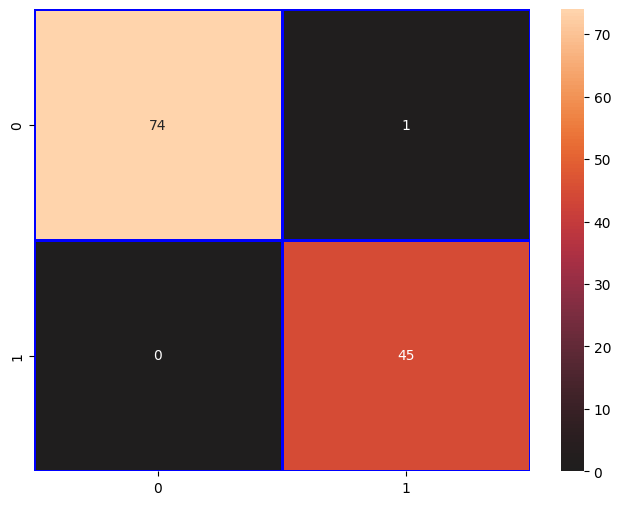

In [44]:
print("Accuracy_score:", round((accuracy_score(y_test, y_pred))*100,2),'%')
print("Loss:", round((1-accuracy_score(y_test, y_pred))*100,2),'%')
print("Cohen_kappa_score:", round((cohen_kappa_score(y_test, y_pred))*100,2),'%')
print("Classification_report:\n",metrics.classification_report(y_test, y_pred))
# print("confusion_matrix:\n", confusion_matrix(y_test, y_pred))
print("confusion_matrix:\n", confusion_matrix(y_test, y_pred))

fig, ax = plt.subplots()
fig.set_size_inches(8,6) # WH
sns.heatmap(confusion_matrix(y_test, y_pred), 
            annot=True,
            linewidths = 2,
            linecolor = "blue",
            center=0)

### prediction for deployment

In [48]:
y_pred = classifier.predict([[1.02,4,0.8,11.3,38,4.8]])
y_pred

array([0])

In [49]:
y_pred = classifier.predict([[1.02,0,1.2,16.5,54,6.2]])
y_pred

array([1])

### save the model to disk

In [50]:
filename = '../Models/rf_Classifier.pkl'
pickle.dump(classifier, open(filename, 'wb'))